<a href="https://colab.research.google.com/github/NickMattiss/ai-ml-principles-exercises/blob/main/ovning1_ai_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import numpy as np

In [3]:
import sklearn.datasets as datasets

In [4]:
data = datasets.load_digits()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
len(data.images)

1797

In [7]:
type(data.images[0])

numpy.ndarray

In [8]:
data.images[0].shape

(8, 8)

In [9]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
data.images[0].dtype

dtype('float64')

In [11]:
data.target[0]

0

In [13]:
np.max(data.images)

16.0

In [12]:
(data.images[0] / 16 * 255).astype(np.uint8)

array([[  0,   0,  79, 207, 143,  15,   0,   0],
       [  0,   0, 207, 239, 159, 239,  79,   0],
       [  0,  47, 239,  31,   0, 175, 127,   0],
       [  0,  63, 191,   0,   0, 127, 127,   0],
       [  0,  79, 127,   0,   0, 143, 127,   0],
       [  0,  63, 175,   0,  15, 191, 111,   0],
       [  0,  31, 223,  79, 159, 191,   0,   0],
       [  0,   0,  95, 207, 159,   0,   0,   0]], dtype=uint8)

In [14]:
from PIL import Image

7


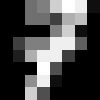

In [15]:
i = 7
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), "L").resize((100, 100), resample=Image.NEAREST)

In [16]:
data.images.shape

(1797, 8, 8)

In [17]:
# -1 means getting the rest of the dimensions needed
data.images.reshape(len(data.images), -1).shape

(1797, 64)

# Train a model
* Perform a dataset split into training data and test data
* Train a SVM classifier
* Evaluate the classifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
flat_dataset = data.images.reshape(len(data.images), -1)
x_train, x_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8) # 0.8 = 8% of data in training set

In [20]:
x_train.shape

(1437, 64)

In [21]:
x_test.shape

(360, 64)

4


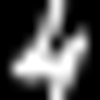

In [22]:
print(y_train[100])
Image.fromarray((x_train[100].reshape(8,8) / 16 * 255).astype(np.uint8), "L").resize((100,100))

1


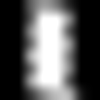

In [23]:
print(y_test[100])
Image.fromarray((x_test[100].reshape(8,8) / 16 * 255).astype(np.uint8), "L").resize((100,100))

In [24]:
from sklearn import svm

In [25]:
model = svm.SVC(gamma=0.001) # gamma=hyperparameter, needs to be tuned
model.fit(x_train, y_train) # call fit to actually train the model

SVC(gamma=0.001)

In [26]:
model.predict(x_train[0:10]) # how we do the inference

array([2, 4, 1, 1, 0, 7, 3, 5, 8, 3])

In [27]:
y_train[0:10]

array([2, 4, 1, 1, 0, 7, 3, 5, 8, 3])

In [28]:
model.predict(x_test[0:10]) # how we do the inference

array([5, 1, 7, 9, 4, 4, 2, 1, 3, 6])

In [29]:
y_test[0:10]

array([5, 1, 7, 9, 4, 4, 2, 1, 3, 6])

In [30]:
from sklearn import metrics
predicted = model.predict(x_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       1.00      1.00      1.00        30
           5       0.98      0.98      0.98        42
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35
           8       1.00      0.97      0.99        38
           9       0.94      1.00      0.97        31

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



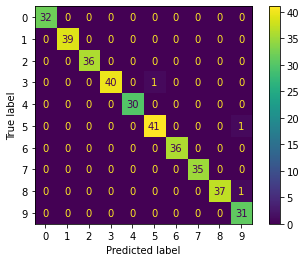

In [31]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

# Save the model to disk
Save the model persistenly so that it can be loaded at a later time in another process for evaluation of inference.

In [33]:
import pickle

In [34]:
with open("model.pkl", "wb") as fio: # w=write b=binary
  pickle.dump(model, fio) # saves the model

In [35]:
with open("model.pkl", "rb") as fio: # r=read b=binary
  mymodel = pickle.load(fio) # load the model

In [38]:
mymodel.predict(x_test[:10])

array([5, 1, 7, 9, 4, 4, 2, 1, 3, 6])

In [37]:
y_test[:10]

array([5, 1, 7, 9, 4, 4, 2, 1, 3, 6])

In [64]:
im = Image.open("num1.jpg").resize((8, 8))

In [65]:
np_im = np.array(im)

In [66]:
np_im.astype(np.float32) / 255 * 16

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.9411765,  9.725491 ,  2.8862746,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.8784314, 12.8      ,  6.901961 ,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  8.470589 ,  8.784314 ,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  8.470589 ,  8.909804 ,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  9.22353  ,  8.721569 ,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  5.584314 ,  8.219608 ,
         0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.1882353,  0.5647059,
         0.       ,  0.       ,  0.       ]], dtype=float32)

In [67]:
preprocessed_img = np_im.astype(np.float32) / 255 * 16

In [68]:
preprocessed_img.shape

(8, 8)

In [69]:
preprocessed_img[None].shape

(1, 8, 8)

In [70]:
preprocessed_img.flatten()[None].shape

(1, 64)

In [ ]:
# preprocessed_img.reshape[-1].shape # other way to flatten your image

In [71]:
model.predict(preprocessed_img.flatten()[None])

array([1])